<h1 align='center'>Name Disambiguation in AMiner, Implementasi Dataset Bibliorafi Menggunakan Artificial Neural Network</h1>

Tujuan model jaringan saraf tiruan adalah memprediksi apakah dua nama pada jurnal/paper/riset yang berbeda adalah sama berdasarkan kemiripan fitur dalam data bibliografi

<img src="https://lh3.googleusercontent.com/ykW1LDV4HqkjU1dVxfvNTM7QSK3LB4L7XhjpMKiPOf7m1TFed2ogSmGnFZf77cIs8XQE6jjGgrH4a1x81qlwL7Dm05oBoeHEz7ic9o41PGujBHs7JEVXLG0o_iNUGgq1wyxM69n1q4pdmFZ02LUNWtp8USdjHhxSbS3RiwmTKbjlz6soB0KvpIHCZu-k3QqSf8hXOFpvlaO-2e4YU8a1mTz-5EVt1iR2bwB2KPDvQx9R_I-phPIL3t2l5_q7SCobcmu4n8Wd_p4tXvOyWqhYyxJY9Td8Qd_RThoTQ6JCTUHi9PoM3w1ZkrVgv2rYzJ38ybcAzWhIwpmpRbt1yTaNGIngUadPgWUZDmnwhYt_2FpfTXFRQfND-l8lLWSEB6HqCplNQGCy_MiMNQqoxZcn3ES30-bkWI9xxgyCCMuYx6ipDnOMfmwyKycsg7KcCi8Tdsfpe6MCWbs4zVXj5FQNOS3vXJ-Vbj5b_Dwk6TyrL9bDBL0wGd5hKiYC9KGUrLDuOJRNdPxET5-XECkiHEBsFvGUFNp8VMElmZ-4JAZRut9LVHeF41-LM_C4mQbeQtR0E5_KBeY3t8fzc5jDhg45HPMG6C3eiPjrlbvSSRiHvL9ba00pzeAO2PYpZOQaxRVuO8yZUt9guQ4ypj6vnOXZKHZEzJn0ECzHC6QoMycvOjrtQwbepEMtxpXN=w1892-h253-no" caption="Dataset yang digunakan dalam format .json"></img>

Dataset yang digunakan adalah dataset <a href="https://github.com/neozhangthe1/disambiguation">Name Disambiguation in AMiner pada situs GitHub</a> yang berasal dari paper penelitian <a href="http://keg.cs.tsinghua.edu.cn/jietang/publications/kdd18_yutao-AMiner-Name-Disambiguation.pdf">Name Disambiguation in AMiner: Clustering, Maintenance, and
Human in the Loop</a>.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

Dataset yang akan diolah pada Jupyter Notebook ini sudah dibersihkan (preprocessing) sehingga menghasilkan sebuah tabel/dataframe berupa angka/nilai kemiripan antar fitur dari dua orang. Fitur-fitur ini antara lain:
1. Nama Author
2. Nama-nama Co-Author
3. Judul Paper
4. Nama Jurnal/Publikasi

Dataframe juga dilengkapi label apakah author satu dan yang lain sama. Label dibuat menggunakan author-id yang berbeda setiap orangnya.

# Import Dataset 

In [2]:
df=pd.read_pickle("D:/kemiripan.pkl")

In [3]:
df.head()

,1,2,author,co-author,title,venue,id
0,Yongqing Huang,Shie-Ming Peng,0.452381,0.658323,0.620002,0.508503,False
1,Yongqing Huang,Xuesi Chen,0.393651,0.661703,0.671015,0.505663,False
2,Yongqing Huang,Quan Liu,0.511905,0.666618,0.655586,0.537345,False
3,Yongqing Huang,Guangtian Zou,0.584249,0.701879,0.709529,0.579301,False
4,Yongqing Huang,Da Xing,0.452381,0.593137,0.717037,0.618576,False


Dataset yang berupa teks diubah menjadi angka/nilai menggunakan algoritma Text-Distance Jaro-Winkler <img src="https://blogs.sap.com/wp-content/uploads/2013/12/p_336669.jpg"></img>

# Membuat Data Input dan Label

In [4]:
X=df[["author","co-author","title","venue"]]
X.reset_index(drop=True)

,author,co-author,title,venue
0,0.452381,0.658323,0.620002,0.508503
1,0.393651,0.661703,0.671015,0.505663
2,0.511905,0.666618,0.655586,0.537345
3,0.584249,0.701879,0.709529,0.579301
4,0.452381,0.593137,0.717037,0.618576
...,...,...,...,...
3126245,0.430556,0.648140,0.571007,0.448127
3126246,0.430556,0.744101,0.647284,0.442652
3126247,0.435897,0.643494,0.621490,0.540206
3126248,0.435897,0.670760,0.680431,0.633456


In [5]:
Y=df["id"]
Y.reset_index(drop=True)

0          False
1          False
2          False
3          False
4          False
           ...  
3126245    False
3126246    False
3126247    False
3126248    False
3126249     True
Name: id, Length: 3126250, dtype: bool

# Normalisasi / Scaling

In [6]:
scaler = MinMaxScaler() 
X=scaler.fit_transform(X)

Menormalisasi data apabila proporsi dalam satu fitur tidak seimbang. Hal ini dilakukan untuk meminimalisir error yang terjadi akibat nilai pengecualian (nilai yang jauh dari yang lain).

# Membagi Data Training dan Testing 

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state = 123,stratify=Y)

Dataset dibagi menjadi data training dan testing dengan perbandingan 9:1 lalu dikaregorikan labelnya

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Membuat Model ANN

In [9]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Model terdiri dari 4 neuron input, 8 neuron hidden layer, dan 2 neuron output sigmoid

<img src="https://lh3.googleusercontent.com/nHB6w6lLB_KEzJte1Ifsk0eY5nWlF318UrZSv3P99sWGt0YQYqKfmT_gYFhV0p0LONWckHHTg7XZ7hGnNWrlOhGogjpDZUuHlydHafNSBP1cIU3PAsKPpTeKcpl0zo2U9RuEAvlJgHpIRLdCv-y9IU5UYBsE53L7bGzfc9zpqX_VFtedr09JCx56o4uWR_U3DqB2wvi2fS12r1RvpIytLVcT6KHFlkSxnq8bR_lPaw37XMzRcnM0M3Cuypy96V2ULDg9-OoIfq8YgSUnRdDnl9_vw3aPh35JXacwtAzCAVUVCQeV_7bCykawL34qGsOTz5RdconFQN6Tcev37rX994MWy61mE3GavXuokV1ZiZGx1iAPCKdH0AFVZKnN1dpbj0FNzTu41qFUammKcRiL91LpZa-nFR2XM909Cr9g6zkVbbxN4ujiqiCTutyIGhVjaXBatsrNp8hzSqaFbJgx9cmClsImze_Oa3vMf_Xd2ksIm49FKcfjkyvjPI_8kC-lCqsJnYRCxXvYljYHP06zurBi8HZGRDWeIa3Y8NqLnKX8eTe1-hYB2CFMr79JvIR_HTrn3Ozjii3CMnbImqoIv8p_js-RRz0y-H-kTabJ3NbUlTS21P2TPqFkd34XDgzlKD-PBz8xVqEG-aglyfRKLEWq0A7M0c_32f_t9lE5lveUERFUo3ZNLXLP=w703-h716-no" width=300 align="center"><img>

# Training Model

In [10]:
history = model.fit(X_train, y_train_one_hot,validation_data=(X_test,y_test_one_hot),epochs=200,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 2813625 samples, validate on 312625 samples
Epoch 1/200
2813625/2813625 [==============================] - 85s 30us/step - loss: 0.0207 - acc: 0.9944 - val_loss: 0.0118 - val_acc: 0.9969
Epoch 2/200
2813625/2813625 [==============================] - 83s 30us/step - loss: 0.0121 - acc: 0.9973 - val_loss: 0.0117 - val_acc: 0.9968
Epoch 3/200
2813625/2813625 [==============================] - 78s 28us/step - loss: 0.0121 - acc: 0.9974 - val_loss: 0.0116 - val_acc: 0.9973
Epoch 4/200
2813625/2813625 [==============================] - 76s 27us/step - loss: 0.0121 - acc: 0.9974 - val_loss: 0.0116 - val_acc: 0.9976
Epoch 5/200
2813625/2813625 [==============================] - 73s 26us/step - loss: 0.0121 - acc: 0.9974 - val_loss: 0.0116 - val_acc: 0.9970
Epoch 6/200
2813625/2813625 [==============================] - 76s 27us/step - loss: 0.0121 - acc: 0.9973 - val_loss: 0.0117 - val_acc: 0.9980
Epoch 7/200
2813625/2813625 [============

Epoch 56/200
2813625/2813625 [==============================] - 80s 28us/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0078 - val_acc: 0.9981
Epoch 57/200
2813625/2813625 [==============================] - 72s 26us/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.0078 - val_acc: 0.9981
Epoch 58/200
2813625/2813625 [==============================] - 72s 25us/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0080 - val_acc: 0.9981
Epoch 59/200
2813625/2813625 [==============================] - 72s 25us/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0078 - val_acc: 0.9981
Epoch 60/200
2813625/2813625 [==============================] - 72s 26us/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0086 - val_acc: 0.9978
Epoch 61/200
2813625/2813625 [==============================] - 72s 25us/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0089 - val_acc: 0.9978
Epoch 62/200
2813625/2813625 [==============================] - 72s 25us/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0081 - val_acc:

Epoch 113/200
2813625/2813625 [==============================] - 72s 25us/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.0078 - val_acc: 0.9978
Epoch 114/200
2813625/2813625 [==============================] - 72s 25us/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.0077 - val_acc: 0.9981
Epoch 115/200
2813625/2813625 [==============================] - 72s 26us/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.0078 - val_acc: 0.9981
Epoch 116/200
2813625/2813625 [==============================] - 72s 25us/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.0079 - val_acc: 0.9981
Epoch 117/200
2813625/2813625 [==============================] - 71s 25us/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.0078 - val_acc: 0.9979
Epoch 118/200
2813625/2813625 [==============================] - 72s 26us/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.0078 - val_acc: 0.9981
Epoch 119/200
2813625/2813625 [==============================] - 72s 25us/step - loss: 0.0080 - acc: 0.9979 - val_loss: 0.0078 - v

# Grafik Training Model

In [1]:
#Simpan grafik
import pandas as pd
#save=pd.Dataframe(history.history)
#save.to_pickle("hasil.pkl")
save=pd.read_pickle("hasil.pkl")

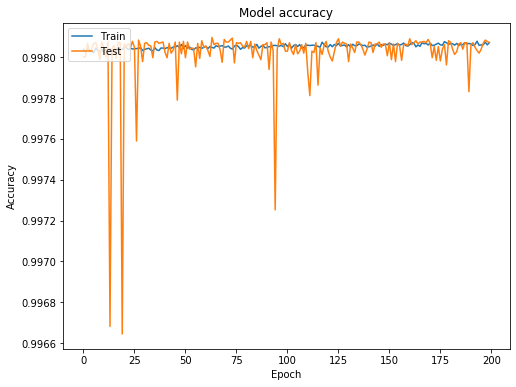

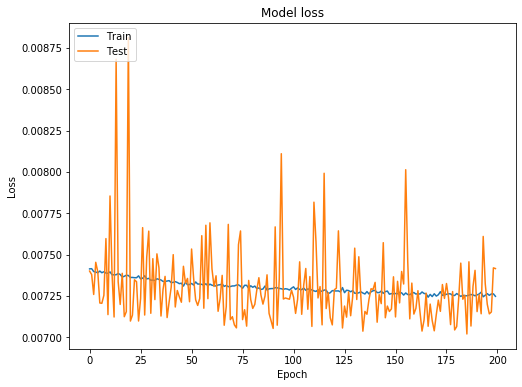

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
# AKURASI
plt.plot(save['acc'])
plt.plot(save['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim()
plt.show()

# LOSS
plt.plot(save['loss'])
plt.plot(save['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim()
plt.show()

Terlihat hasil pelatihan bagus karena perbandingan antara pelatihan dan validasi mirip, tidak terjadi overfitting ataupun underfitting.

# Hasil Evaluasi

In [12]:
y_pred = model.predict_classes(X_test)

In [13]:
# Model evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[297622,     31],
       [   579,  14393]], dtype=int64)

In [15]:
tp=cm[0][0]
tn=cm[1][1]
fp=cm[1][0]
fn=cm[0][1]
p=tp+fn
n=tn+fp

In [16]:
accuracy=(tp+tn)/(p+n)
recall=tp/p
precision=tp/(tp+fp)
fscore=(2*precision*recall)/(precision+recall)
report={'precision':precision,'recall':recall,'accuracy':accuracy,'fscore':fscore}

In [17]:
print(report)

{'precision': 0.9980583566118155, 'recall': 0.9998958518812174, 'accuracy': 0.9980487804878049, 'fscore': 0.9989762592849927}


<html>
    <a href="http://www.unsri.ac.id/?act=detil_mahasiswa&mhs=09011281722064-9-10003&akt=2017" target="_blank">Mohammad El Qiliqsandy<br>09011281722064<br><img src="https://akademik.unsri.ac.id/images/foto_mhs/2017/09011281722064.jpg" width=100 align="left"><img></a>
    <a href="http://unsri.ac.id"><img src="https://upload.wikimedia.org/wikipedia/en/9/92/UNSRI_Logo.png" align="right" width=140></img></a>
</html>